# Modelado

## Selección de la técnica de modelado


In [ ]:
import pandas as pd

data = pd.read_excel('data_final.xlsx')

,CÓDIGO SINIESTRO,DISTRITO,TIPO PERSONA,GRAVEDAD,EDAD,SEXO,VEHÍCULO,DIA,HORA,TIPO DE VÍA,ZONIFICACIÓN,CARACTERÍSTICAS DE VÍA,ESTADO MODALIDAD,POSEE LICENCIA
0,A-2021-01-17,PACCHO,CONDUCTOR,0,28,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,1
1,A-2021-01-17,PACCHO,NO CONDUCTOR,1,72,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
2,A-2021-01-17,PACCHO,NO CONDUCTOR,0,19,FEMENINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
3,A-2021-01-17,PACCHO,NO CONDUCTOR,0,19,FEMENINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
4,A-2021-01-17,PACCHO,NO CONDUCTOR,0,27,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0


In [7]:
data = data.drop('CÓDIGO SINIESTRO', axis=1)

In [8]:
data

,DISTRITO,TIPO PERSONA,GRAVEDAD,EDAD,SEXO,VEHÍCULO,DIA,HORA,TIPO DE VÍA,ZONIFICACIÓN,CARACTERÍSTICAS DE VÍA,ESTADO MODALIDAD,POSEE LICENCIA
0,PACCHO,CONDUCTOR,0,28,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,1
1,PACCHO,NO CONDUCTOR,1,72,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
2,PACCHO,NO CONDUCTOR,0,19,FEMENINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
3,PACCHO,NO CONDUCTOR,0,19,FEMENINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
4,PACCHO,NO CONDUCTOR,0,27,MASCULINO,AUTOMÓVIL,DOMINGO,16,CARRETERA,RURAL,OTRO,HABILITADO,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3532,LOS OLIVOS,CONDUCTOR,0,25,MASCULINO,MOTOCICLETA,SÁBADO,20,AVENIDA,COMERCIAL,TRAMO RECTO,NO CORRESPONDE,0
3533,LIMA,CONDUCTOR,0,35,MASCULINO,TRIMOTO PASAJERO,DOMINGO,22,AVENIDA,COMERCIAL,INTERSECCIÓN,NO HABILITADO,0
3534,LIMA,PEATÓN,1,39,MASCULINO,TRIMOTO PASAJERO,DOMINGO,22,AVENIDA,COMERCIAL,INTERSECCIÓN,NO HABILITADO,0
3535,LOS OLIVOS,CONDUCTOR,0,27,MASCULINO,OTRO,LUNES,10,AVENIDA,COMERCIAL,OTRO,HABILITADO,0


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Suponiendo que tu DataFrame se llama data_modelado
data_modelado = data.copy()

# 1. Convertir SEXO a binaria
data_modelado['SEXO'] = data_modelado['SEXO'].map({'MASCULINO': 1, 'FEMENINO': 0})

# 2. Lista de variables categóricas con más de 2 categorías
categoricas_multiclase = [
    'DISTRITO', 'TIPO PERSONA', 'VEHÍCULO', 'DIA',
    'TIPO DE VÍA', 'ZONIFICACIÓN', 'CARACTERÍSTICAS DE VÍA',
    'ESTADO MODALIDAD'
]

# 3. Aplicar OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_array = encoder.fit_transform(data_modelado[categoricas_multiclase])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(categoricas_multiclase), index=data_modelado.index)

# 4. Concatenar y eliminar las columnas originales
data_modelado = pd.concat([data_modelado.drop(columns=categoricas_multiclase), encoded_df], axis=1)

# Mostrar las primeras filas
data_modelado.head()

c:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,GRAVEDAD,EDAD,SEXO,HORA,POSEE LICENCIA,DISTRITO_ANCON,DISTRITO_ATAVILLOS ALTO,DISTRITO_ATE,DISTRITO_AUCALLAMA,DISTRITO_BARRANCA,...,TIPO DE VÍA_CARRETERA,TIPO DE VÍA_OTRO,ZONIFICACIÓN_ESCOLAR,ZONIFICACIÓN_INDUSTRIAL,ZONIFICACIÓN_RESIDENCIAL,ZONIFICACIÓN_RURAL,CARACTERÍSTICAS DE VÍA_OTRO,CARACTERÍSTICAS DE VÍA_TRAMO RECTO,ESTADO MODALIDAD_NO CORRESPONDE,ESTADO MODALIDAD_NO HABILITADO
0,0,28,1,16,1,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1,72,1,16,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0,19,0,16,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,0,19,0,16,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0,27,1,16,0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [26]:
!pip install scikit-plot

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import time

In [28]:
X = data_modelado.drop(columns=['GRAVEDAD']) 
y = data_modelado['GRAVEDAD']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
modelos = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

In [50]:
def evaluar_modelo(nombre, modelo):
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
    start = time.time()
    pipeline.fit(X_train, y_train)
    tiempo = time.time() - start
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, pipeline.predict_proba(X_test)[:, 1])
    return nombre, acc, f1, auc, tiempo

In [51]:
resultados = []
for nombre, modelo in modelos.items():
    res = evaluar_modelo(nombre, modelo)
    resultados.append(res)

resultados_df = pd.DataFrame(resultados, columns=['Modelo', 'Accuracy', 'F1-score', 'ROC-AUC', 'Tiempo (s)'])
print(resultados_df.sort_values(by='F1-score', ascending=False))

               Modelo  Accuracy  F1-score   ROC-AUC  Tiempo (s)
2       Random Forest  0.872881  0.840426  0.938588    0.760081
1       Decision Tree  0.861582  0.826855  0.859923    0.072956
0  LogisticRegression  0.790960  0.715385  0.855079    0.372784
4                 SVM  0.781073  0.702495  0.850674    4.068576
3                 KNN  0.694915  0.548117  0.714977    0.017989


In [56]:
modelos = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42)
}

In [57]:
parametros_grid = {
    'Random Forest': {
        'modelo__n_estimators': [100, 200, 300],
        'modelo__max_depth': [10, 20, None],
        'modelo__min_samples_split': [2, 5, 10]
    },
    'Decision Tree': {
        'modelo__max_depth': [5, 10, 20, None],
        'modelo__min_samples_split': [2, 5, 10],
        'modelo__criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'modelo__C': [0.01, 0.1, 1, 10],
        'modelo__penalty': ['l1', 'l2'],
        'modelo__solver': ['liblinear', 'saga']
    }
}

In [58]:
# DataFrame para guardar resultados
resultados_grid = []

# Comparación de modelos con búsqueda en cuadrícula
for nombre, modelo in modelos.items():
    print(f"🔍 Optimizando {nombre}...")
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
    
    grid_search = GridSearchCV(pipeline,
                               parametros_grid[nombre],
                               cv=5,
                               scoring='accuracy',
                               n_jobs=-1,
                               verbose=0)
    
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    tiempo = time.time() - start_time

    y_pred = grid_search.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_pred)

    resultados_grid.append({
        'Modelo': nombre,
        'Accuracy': acc,
        'F1-score': f1,
        'ROC-AUC': roc,
        'Tiempo (s)': tiempo,
        'Mejores Parámetros': grid_search.best_params_
    })

# Mostrar resultados en un DataFrame ordenado por F1-score
df_resultados_grid = pd.DataFrame(resultados_grid).sort_values(by='F1-score', ascending=False)
print("\n🔎 Resultados con GridSearchCV:")
print(df_resultados_grid)

🔍 Optimizando Random Forest...
🔍 Optimizando Decision Tree...
🔍 Optimizando LogisticRegression...

🔎 Resultados con GridSearchCV:
               Modelo  Accuracy  F1-score   ROC-AUC  Tiempo (s)  \
1       Decision Tree  0.872881  0.847458  0.873585    1.528344   
0       Random Forest  0.867232  0.833333  0.860271   40.416204   
2  LogisticRegression  0.799435  0.724806  0.776061    9.460416   

                                  Mejores Parámetros  
1  {'modelo__criterion': 'entropy', 'modelo__max_...  
0  {'modelo__max_depth': None, 'modelo__min_sampl...  
2  {'modelo__C': 0.1, 'modelo__penalty': 'l1', 'm...  


🎯 Visualizando Random Forest


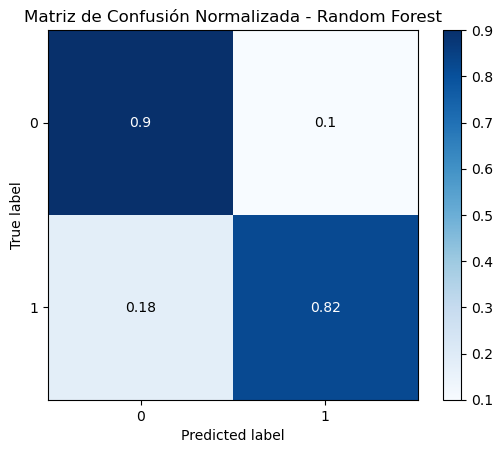

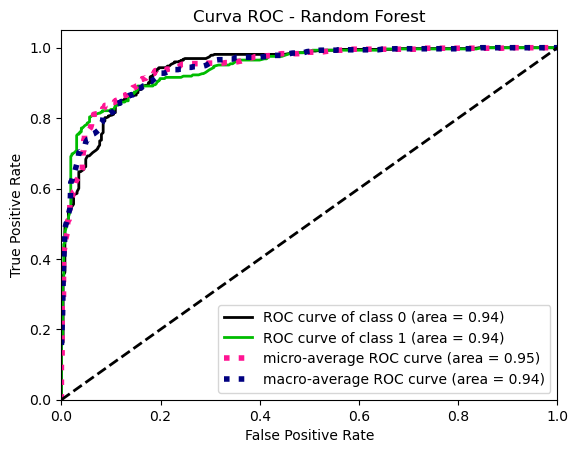

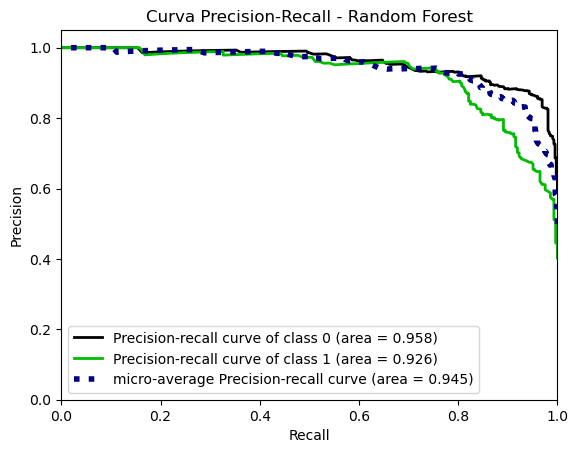

🎯 Visualizando Decision Tree


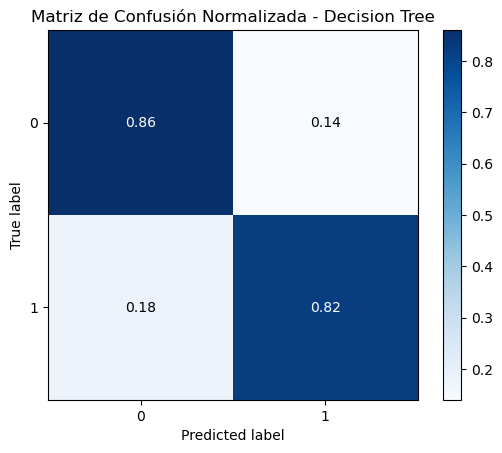

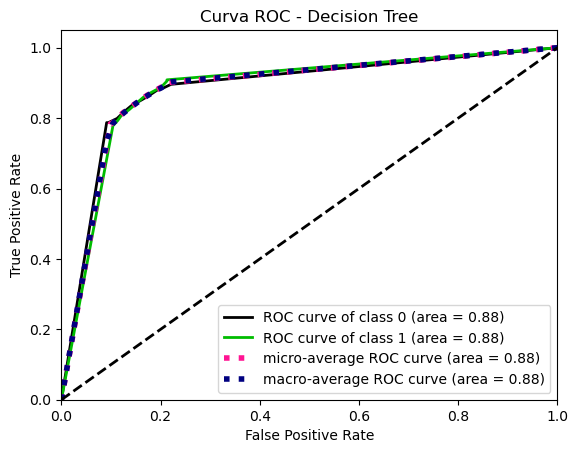

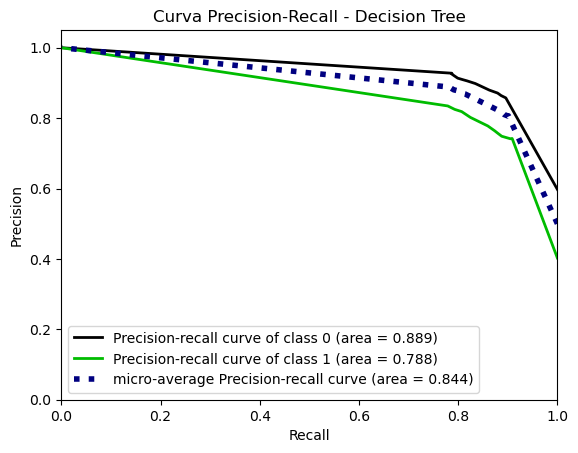

In [66]:
import scikitplot as skplt
import matplotlib.pyplot as plt

# Entrenamos los dos modelos con los mejores parámetros encontrados
mejores_modelos = {
    'Random Forest': RandomForestClassifier(
        max_depth=None,
        min_samples_split=2,
        n_estimators=300,
        random_state=42
    ),
    'Decision Tree': DecisionTreeClassifier(
        criterion='entropy',
        max_depth=20,
        min_samples_split=5,
        random_state=42
    )
}

for nombre, modelo in mejores_modelos.items():
    print(f"🎯 Visualizando {nombre}")
    
    # Creamos el pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', modelo)
    ])
    
    # Entrenamos
    pipeline.fit(X_train, y_train)
    
    # Predicciones
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)
    
    # 1️⃣ Matriz de confusión normalizada
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)
    plt.title(f'Matriz de Confusión Normalizada - {nombre}')
    plt.show()
    
    # 2️⃣ Curva ROC
    skplt.metrics.plot_roc(y_test, y_proba)
    plt.title(f'Curva ROC - {nombre}')
    plt.show()

    # 3️⃣ Curva Precision-Recall
    skplt.metrics.plot_precision_recall(y_test, y_proba)
    plt.title(f'Curva Precision-Recall - {nombre}')
    plt.show()

## Construcción del modelo

In [108]:
# Crear el model
modelo_final = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    random_state=42
)

# Crear el pipeline con escalador y el modelo
pipeline_final = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', modelo_final)
])

# Entrenar el modelo final
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo',
                 RandomForestClassifier(min_samples_split=10,
                                        random_state=42))])

In [109]:
# Predicciones
y_pred = pipeline_final.predict(X_test)
y_proba = pipeline_final.predict_proba(X_test)[:, 1]

# Evaluaciones
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc = roc_auc_score(y_test, y_proba)

print("🔍 Evaluación del modelo final - Random Forest:")
print(f"Accuracy: {acc:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc:.4f}")
print("\n🔍 Reporte de clasificación:")
print(classification_report(y_test, y_pred))

🔍 Evaluación del modelo final - Random Forest:
Accuracy: 0.8418
F1-score: 0.7971
ROC-AUC: 0.9158

🔍 Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       423
           1       0.82      0.77      0.80       285

    accuracy                           0.84       708
   macro avg       0.84      0.83      0.83       708
weighted avg       0.84      0.84      0.84       708



In [110]:
def optimizar_random_forest(X_train, y_train, X_test, y_test):
    # Hiperparámetros a probar
    parametros = {
        'modelo__n_estimators': [100, 200, 300],
        'modelo__max_depth': [10, 20, None],
        'modelo__min_samples_split': [2, 5, 10],
        'modelo__max_features': ['sqrt', 'log2'],
        'modelo__class_weight': [None, 'balanced']
    }

    # Pipeline con escalador y Random Forest
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('modelo', RandomForestClassifier(random_state=42))
    ])

    # GridSearchCV para encontrar la mejor combinación
    grid = GridSearchCV(pipeline, parametros, 
                        cv=5, 
                        scoring='f1',  # Puedes cambiar a 'accuracy' o 'roc_auc' si prefieres
                        n_jobs=-1,
                        verbose=1)

    # Tiempo de ejecución
    inicio = time.time()
    grid.fit(X_train, y_train)
    fin = time.time()

    # Mejor modelo
    mejor_modelo = grid.best_estimator_
    y_pred = mejor_modelo.predict(X_test)
    y_prob = mejor_modelo.predict_proba(X_test)[:, 1]

    # Métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_prob)

    print("\n✅ Mejor configuración encontrada:")
    print(grid.best_params_)
    print(f"\n🧪 Resultados en test set:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC AUC: {roc:.4f}")
    print(f"⏱️ Tiempo total de búsqueda: {fin - inicio:.2f} segundos")

    return mejor_modelo

In [111]:
modelo_final_rf = optimizar_random_forest(X_train, y_train, X_test, y_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits

✅ Mejor configuración encontrada:
{'modelo__class_weight': None, 'modelo__max_depth': None, 'modelo__max_features': 'sqrt', 'modelo__min_samples_split': 2, 'modelo__n_estimators': 300}

🧪 Resultados en test set:
Accuracy: 0.8672
F1-score: 0.8333
ROC AUC: 0.9429
⏱️ Tiempo total de búsqueda: 144.66 segundos


In [117]:
# Modelo final con los mejores hiperparámetros
modelo_final_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=2,
        max_features='sqrt',
        class_weight=None,
        random_state=42
    ))
])

# Entrenamiento final
modelo_final_rf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [118]:
y_pred_final = modelo_final_rf.predict(X_test)
y_prob_final = modelo_final_rf.predict_proba(X_test)[:, 1]


📊 Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       423
           1       0.84      0.82      0.83       285

    accuracy                           0.87       708
   macro avg       0.86      0.86      0.86       708
weighted avg       0.87      0.87      0.87       708



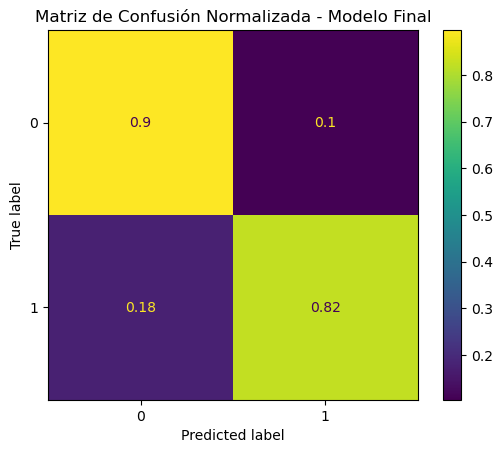

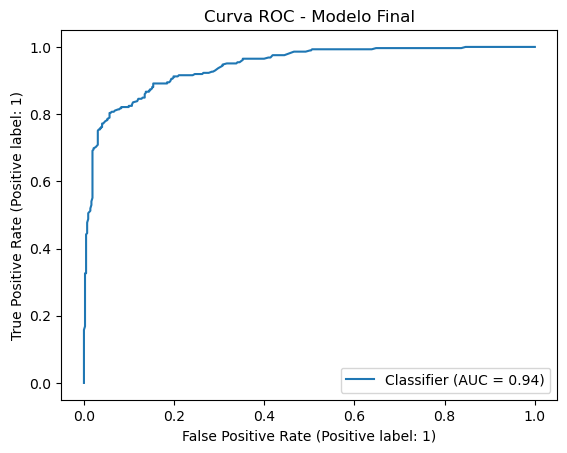

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

# Reporte de clasificación
print("\n📊 Reporte de clasificación final:")
print(classification_report(y_test, y_pred_final))

# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, normalize='true')
plt.title("Matriz de Confusión Normalizada - Modelo Final")
plt.show()

# Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_final)
plt.title("Curva ROC - Modelo Final")
plt.show()


In [122]:

# Predicciones sobre entrenamiento
y_pred_train = modelo_final_rf.predict(X_train)

# F1-score en entrenamiento
f1_entrenamiento = f1_score(y_train, y_pred_train)
print(f"🎯 F1-score en entrenamiento: {f1_entrenamiento:.4f}")

🎯 F1-score en entrenamiento: 0.9965


In [123]:
from sklearn.model_selection import cross_val_score

# Validación cruzada sobre TODO el dataset original (X, y)
f1_validacion = cross_val_score(modelo_final_rf, X, y, cv=5, scoring='f1', n_jobs=-1)
print(f"🧪 F1-score validación cruzada: {f1_validacion.mean():.4f} ± {f1_validacion.std():.4f}")

🧪 F1-score validación cruzada: 0.7061 ± 0.0203


In [124]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', RandomForestClassifier(random_state=42))
])

param_grid = {
    'modelo__n_estimators': [100, 200, 300],
    'modelo__max_depth': [10, 15, 20],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4],
    'modelo__max_features': ['sqrt', 0.5],
}

grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor F1 en validación:", grid.best_score_)

Mejores parámetros: {'modelo__max_depth': 20, 'modelo__max_features': 0.5, 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 2, 'modelo__n_estimators': 200}
Mejor F1 en validación: 0.8194797005701975


In [132]:
# Modelo final con los mejores hiperparámetros
modelo_seleccionado = Pipeline([
    ('scaler', StandardScaler()),
    ('modelo', RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        max_features=0.5,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight=None,
        random_state=42
    ))
])


# Entrenamiento final
modelo_seleccionado.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo',
                 RandomForestClassifier(max_depth=20, max_features=0.5,
                                        n_estimators=200, random_state=42))])

In [133]:
y_pred_final = modelo_seleccionado.predict(X_test)
y_prob_final = modelo_seleccionado.predict_proba(X_test)[:, 1]

print("\n📊 Reporte de clasificación final:")
print(classification_report(y_test, y_pred_final))


📊 Reporte de clasificación final:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90       423
           1       0.87      0.83      0.85       285

    accuracy                           0.88       708
   macro avg       0.88      0.87      0.88       708
weighted avg       0.88      0.88      0.88       708



In [134]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con scoring F1
f1_scores_val = cross_val_score(
    modelo_seleccionado,  # Este es tu pipeline entrenado con los mejores hiperparámetros
    X_train, y_train,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Resultados
print(f"🧪 F1-score validación cruzada: {f1_scores_val.mean():.4f} ± {f1_scores_val.std():.4f}")

🧪 F1-score validación cruzada: 0.8195 ± 0.0141


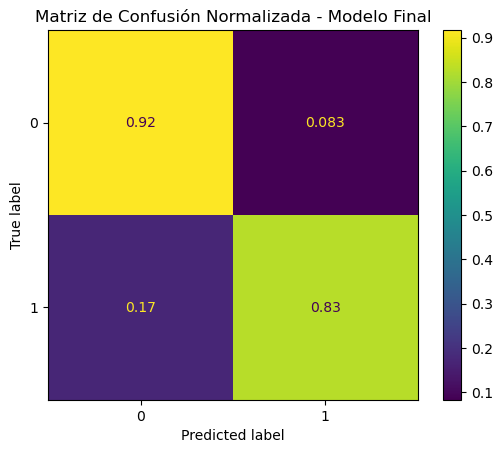

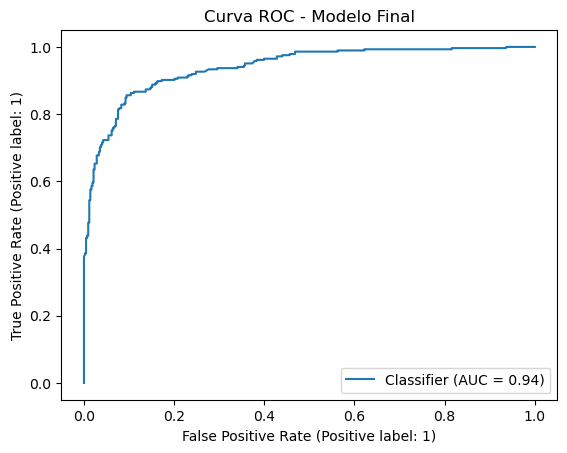

In [135]:
# Matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_final, normalize='true')
plt.title("Matriz de Confusión Normalizada - Modelo Final")
plt.show()

#  Curva ROC
RocCurveDisplay.from_predictions(y_test, y_prob_final)
plt.title("Curva ROC - Modelo Final")
plt.show()


c:\Users\LENOVO\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


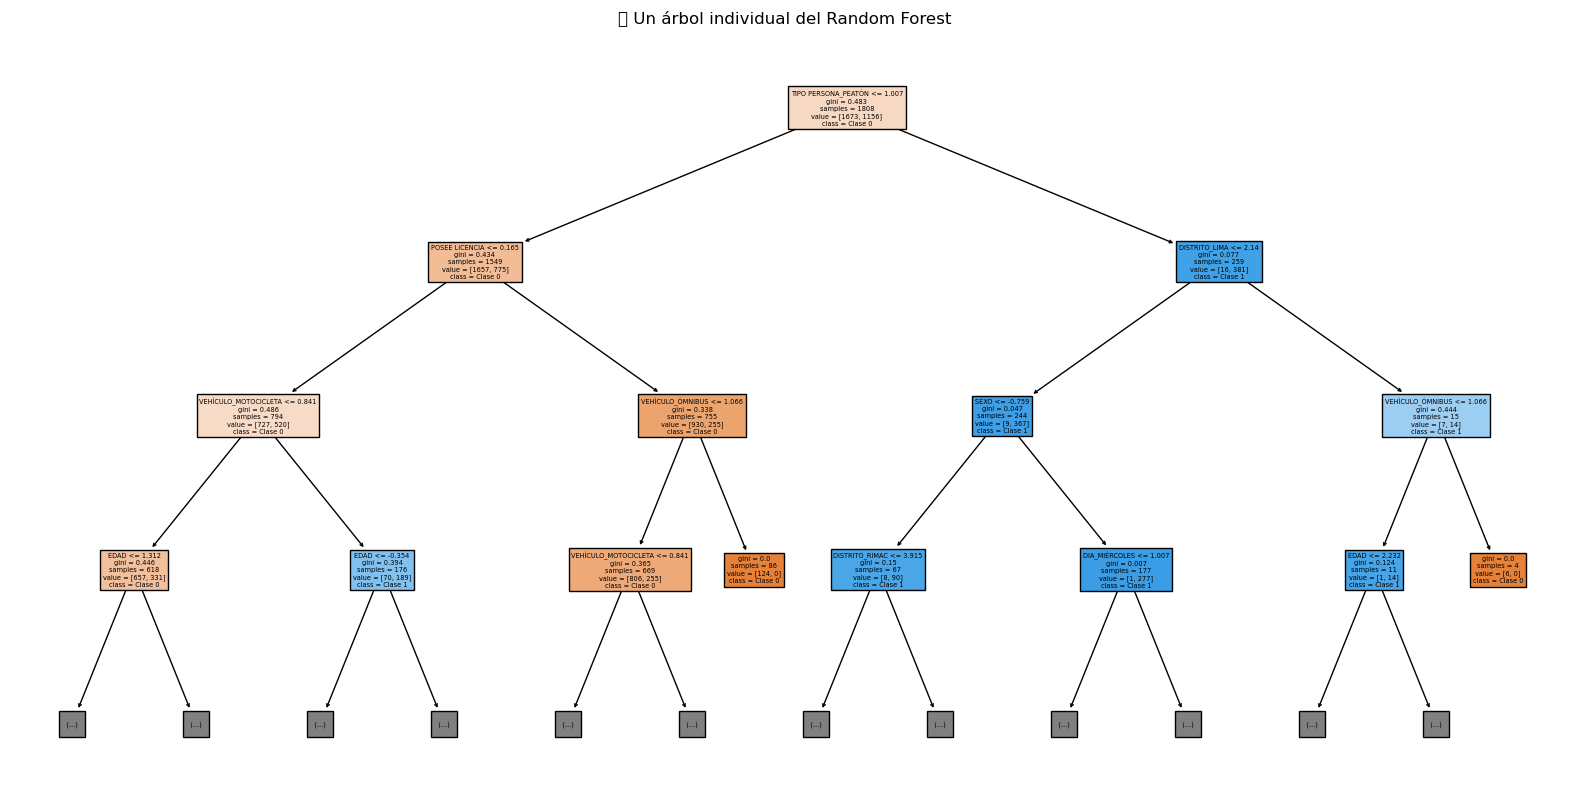

In [139]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(modelo_seleccionado.named_steps['modelo'].estimators_[0],
          feature_names=X.columns,
          class_names=['Clase 0', 'Clase 1'],
          filled=True,
          max_depth=3)  # limitar profundidad para que sea legible
plt.title("🌳 Un árbol individual del Random Forest")
plt.show()

In [ ]:
import joblib
joblib.dump(modelo_seleccionado, 'modelo_final_rf.pkl')

['modelo_final_rf.pkl']